## **Decision Tree**



**Objective:**

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

**Tasks:**

1. Data Preparation:Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.

3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features

**Interview Questions:**
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?




##**Data Preparation:**


In [891]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
#

In [892]:
df1  = pd.read_excel('heart_disease.xlsx', sheet_name=0)

In [893]:
df1

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [894]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


In [895]:
df = pd.read_excel('heart_disease.xlsx', sheet_name=1)

In [896]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [898]:
df.shape

(908, 13)

## **Exploratory Data Analysis (EDA):**

Null Values

In [899]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [900]:
df.oldpeak.unique()

array([ 2.3,  0. ,  0.4,  1.5,  1. ,  nan,  2.6,  0.5,  1.2,  3.5,  1.4,
        1.1,  0.6,  2. ,  1.6,  0.1,  0.3,  1.3,  0.2,  2.4,  1.8,  3. ,
        0.8,  1.9,  0.9,  0.7,  4.2, -0.5, -0.1, -1.1,  2.1,  3.6,  1.7,
        3.1,  2.2,  2.5,  2.8, -1.5, -0.9, -2.6, -0.8,  4. ,  5. , -1. ,
        3.4, -2. , -0.7,  3.2,  6.2,  5.6,  2.9,  3.7,  4.4,  3.8])

In [901]:
null_values = df[df.isnull().any(axis=1)]

In [902]:
null_values

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,False,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,FALSE,NaN,upsloping,reversable defect,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,TURE,NaN,upsloping,reversable defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,TURE,NaN,flat,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,69,Male,asymptomatic,154,289,True,st-t abnormality,128,TURE,NaN,flat,fixed defect,3
878,64,Male,asymptomatic,134,306,True,st-t abnormality,73,TURE,NaN,upsloping,reversable defect,3
879,60,Male,non-anginal,186,316,True,st-t abnormality,70,TURE,NaN,flat,fixed defect,3
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


null values percentage

In [903]:
df['oldpeak'].isnull().sum()

62

In [904]:
len(df)

908

In [905]:
null_percentage = (df['oldpeak'].isnull().sum() / len(df)) * 100
print("Percentage of null values in 'oldpeak':", null_percentage)

Percentage of null values in 'oldpeak': 6.828193832599119


replace Nan with median

In [906]:
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

Check the Null Values

In [907]:
df.isnull().sum().sum()

0

Duplicate Values

In [908]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

     age   sex           cp  trestbps  chol    fbs           restecg  thalch  \
765   58  Male  non-anginal       150   219  False  st-t abnormality     118   

    exang  oldpeak        slope    thal  num  
765  True      0.0  downsloping  normal    2  


We have 1 duplicate_row & need to drop it

In [909]:
df = df.drop_duplicates()

In [910]:
df.duplicated().sum()

0

No Duplicate values are found


Check for unique values in categorical columns

In [911]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print("\nUnique Values in", column, ":", unique_values)


Unique Values in sex : ['Male' 'Female']

Unique Values in cp : ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

Unique Values in restecg : ['lv hypertrophy' 'normal' 'st-t abnormality']

Unique Values in exang : [False True 'FALSE' 'TURE']

Unique Values in slope : ['downsloping' 'flat' 'upsloping']

Unique Values in thal : ['fixed defect' 'normal' 'reversable defect']


In [912]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,907.0,53.787211,9.162016,29.0,47.5,54.0,60.0,77.0
trestbps,907.0,133.412348,20.405432,0.0,120.0,130.0,144.0,200.0
chol,907.0,201.465270,112.158285,0.0,176.5,224.0,270.0,603.0
thalch,907.0,135.976847,26.813075,60.0,118.0,138.0,156.0,202.0
oldpeak,907.0,0.865491,1.060629,-2.6,0.0,0.5,1.5,6.2
num,907.0,1.007718,1.144594,0.0,0.0,1.0,2.0,4.0


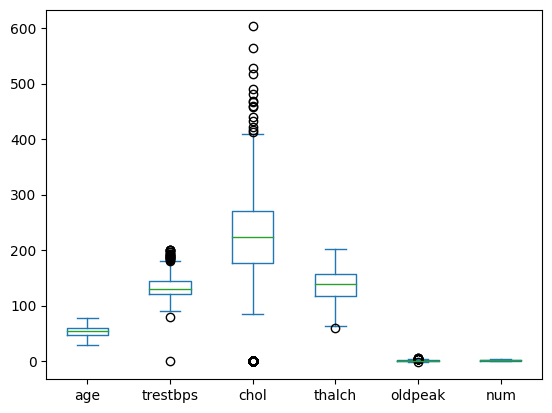

In [913]:
df.plot(kind='box')
plt.show()

In [914]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 93.0+ KB


In [915]:
categorical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in categorical_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Appling flooring and capping

  df[column] = np.where(df[column] <  lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

It checks for values in the column where the condition df[column] < lower_bound is True.

If True (i.e., if the value is below the lower bound), the value is replaced by lower_bound.

If False (i.e., if the value is not below the lower bound), it keeps the original value df[column].


---
Similarly, this line checks for values where df[column] > upper_bound.

If True (i.e., if the value is above the upper bound), the value is replaced by upper_bound.

If False, it keeps the original value df[column].


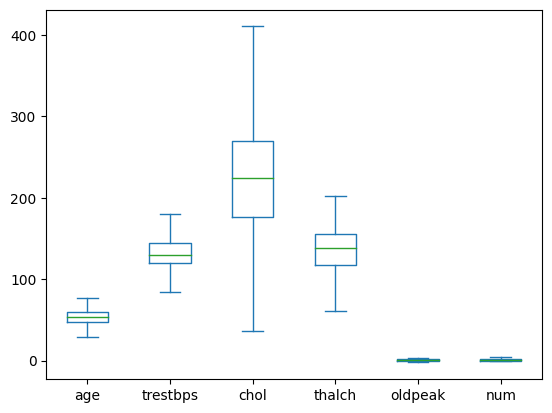

In [916]:
df.plot(kind='box')
plt.show()

## **Feature Engineering:**

**Scaling Numerical Features:**

For decision tree-based algorithms like Decision Trees, Random Forests, and Gradient Boosting Machines, scaling the data is generally not necessary. These algorithms split the data based on feature thresholds, making them inherently insensitive to the scale of the input features. Unlike distance-based algorithms or those that rely on gradient descent, decision trees do not require scaled data for proper functioning. Therefore, scaling is typically not needed when using tree-based models.

In [917]:
df2 = df.copy()

In [918]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    float64
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    float64
 4   chol      907 non-null    float64
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    float64
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    float64
dtypes: bool(1), float64(6), object(6)
memory usage: 93.0+ KB


In [ ]:
#Using LabelEncoder
'''
categorical_column = df.select_dtypes(include=['object']).columns
for column in categorical_column:
  # Convert the column to string type to ensure uniformity
  df[column] = df[column].astype(str) #Encoders require their input argument must be ['bool', 'str']
  #so we convert all obj dtype to str and than convert str dtype to labelencoder
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
'''

In [920]:
#Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df2, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])
df_encoded = df_encoded.astype(int)

# ALSO we can perform One-Hotencoding for catgorical columns

In [921]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       907 non-null    int64
 1   trestbps                  907 non-null    int64
 2   chol                      907 non-null    int64
 3   fbs                       907 non-null    int64
 4   thalch                    907 non-null    int64
 5   oldpeak                   907 non-null    int64
 6   num                       907 non-null    int64
 7   sex_Female                907 non-null    int64
 8   sex_Male                  907 non-null    int64
 9   cp_asymptomatic           907 non-null    int64
 10  cp_atypical angina        907 non-null    int64
 11  cp_non-anginal            907 non-null    int64
 12  cp_typical angina         907 non-null    int64
 13  restecg_lv hypertrophy    907 non-null    int64
 14  restecg_normal            907 non-null    int64

correlation matrix

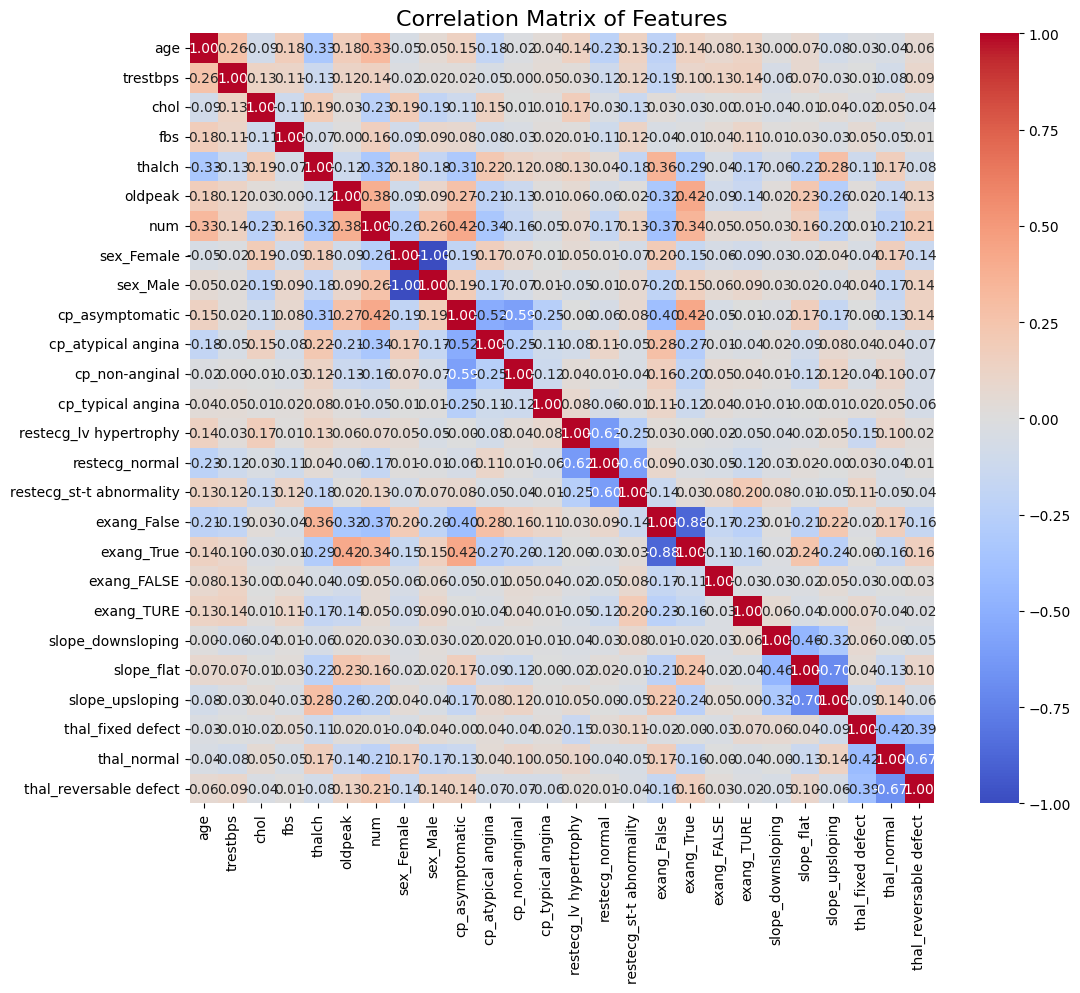

In [922]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

In [923]:
pd.set_option('display.max_columns', None)
df_encoded.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,1,150,2,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0
1,41,135,203,0,132,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
2,57,140,192,0,148,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
3,52,118,186,0,190,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
4,57,110,201,0,126,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [924]:
df3 = df_encoded

In [925]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       907 non-null    int64
 1   trestbps                  907 non-null    int64
 2   chol                      907 non-null    int64
 3   fbs                       907 non-null    int64
 4   thalch                    907 non-null    int64
 5   oldpeak                   907 non-null    int64
 6   num                       907 non-null    int64
 7   sex_Female                907 non-null    int64
 8   sex_Male                  907 non-null    int64
 9   cp_asymptomatic           907 non-null    int64
 10  cp_atypical angina        907 non-null    int64
 11  cp_non-anginal            907 non-null    int64
 12  cp_typical angina         907 non-null    int64
 13  restecg_lv hypertrophy    907 non-null    int64
 14  restecg_normal            907 non-null    int64

# **Decision Tree Classification:**

Splitting the Data:

In [926]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df3.drop(columns=['num'])  # Features
y = df3['num']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [941]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((725, 25), (182, 25), (725,), (182,))

Implementing a Decision Tree Classification model using a library like scikit-learn.

In [942]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [943]:
pred = model.predict(X_test)
pred

array([0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 2, 3, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1,
       1, 0, 0, 1, 0, 3, 3, 0, 0, 1, 0, 0, 0, 3, 3, 1, 0, 1, 0, 0, 3, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 3, 0, 0, 4, 0, 1, 3, 1, 0, 3, 2, 0, 1,
       3, 2, 3, 1, 0, 3, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       3, 1, 0, 0, 0, 0, 1, 1, 3, 0, 2, 0, 0, 1, 3, 3, 0, 2, 1, 1, 1, 1,
       0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0, 0, 3, 2, 0, 0, 1, 2, 1, 1, 0,
       1, 2, 3, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 3, 4, 1, 0, 3, 1, 0, 0, 0, 2,
       2, 1, 0, 3, 3, 0])

In [930]:
#calculate accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5384615384615384


Calculate classification_report metrics

In [944]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        89
           1       0.39      0.40      0.40        47
           2       0.19      0.20      0.20        20
           3       0.27      0.35      0.31        17
           4       0.00      0.00      0.00         9

    accuracy                           0.53       182
   macro avg       0.32      0.34      0.33       182
weighted avg       0.52      0.53      0.53       182



Calculate using evalution metrics

In [932]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), average='macro', multi_class='ovr') # Changed clf to model

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5384615384615384
Precision: 0.5377246283128636
Recall: 0.5384615384615384
F1 Score: 0.5367800651940614
ROC AUC Score: 0.6125413192993309


**Visualization**

In [933]:
import plotly.graph_objects as go

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
values = [accuracy, precision, recall, f1, roc_auc]

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=metrics, y=values, marker_color=['blue', 'green', 'orange', 'purple', 'red'])])
fig.update_layout(title='Evaluation Metrics',
                  xaxis_title='Metrics',
                  yaxis_title='Score',
                  yaxis=dict(range=[0, 1]),
                  showlegend=False)
fig.show()


# **Hyperparameter Tuning & Model Evaluation and Analysis:**

In [934]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Testing Set:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Accuracy on Testing Set: 0.5769230769230769


In [935]:
pip install graphviz pydotplus

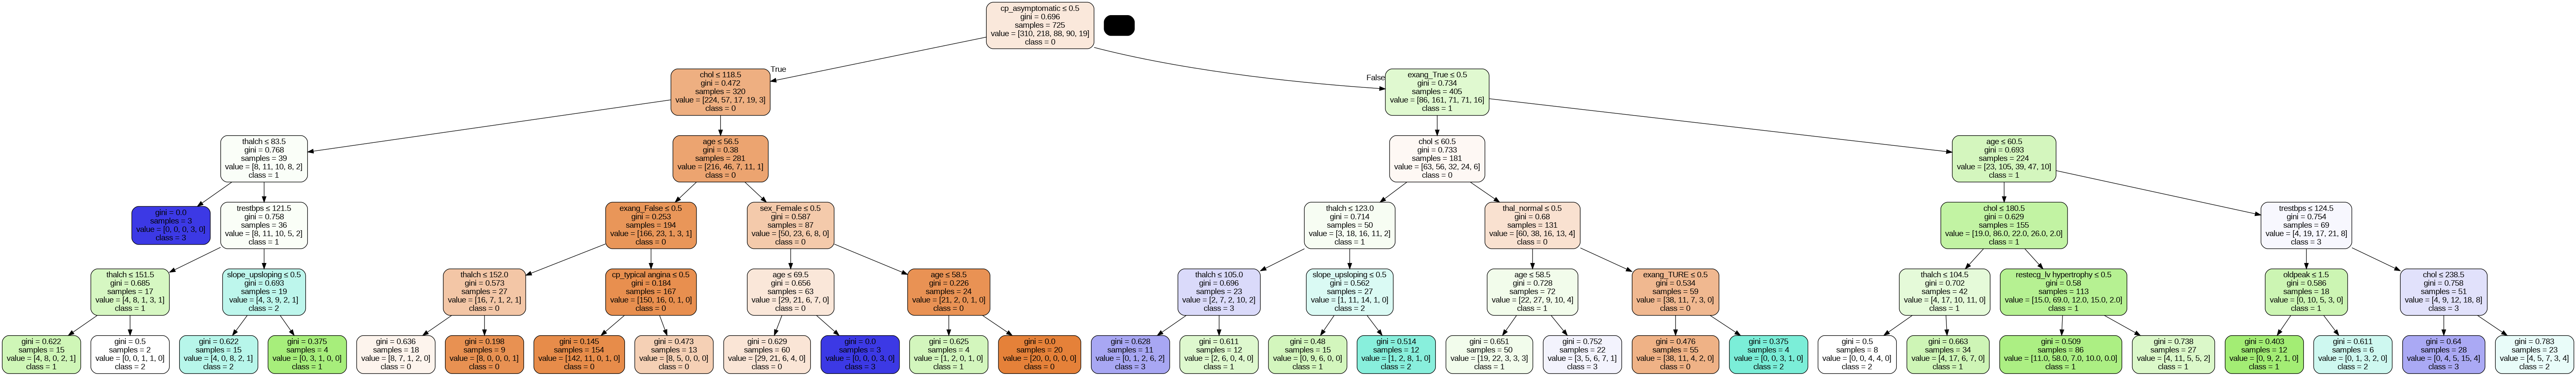

In [947]:
from IPython.display import Image
import pydotplus

# Export the decision tree to DOT format
dot_data = export_graphviz(best_clf, out_file=None,
                           feature_names=X_train.columns,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz object
graph = pydotplus.graph_from_dot_data(dot_data)

# Generate image from the graph
image = Image(graph.create_png())

display(image)


This indicates that the selected combination of hyperparameters

('criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2)

Or we can use ,  But the tree is not clear to view

In [937]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [938]:
fn= list(df3.columns)
fn.remove('num')

In [939]:
# prompt: list unique num column in a list

cn = df3['num'].unique().tolist()
print(cn)


[0, 1, 2, 3, 4]


<Figure size 1200x800 with 0 Axes>

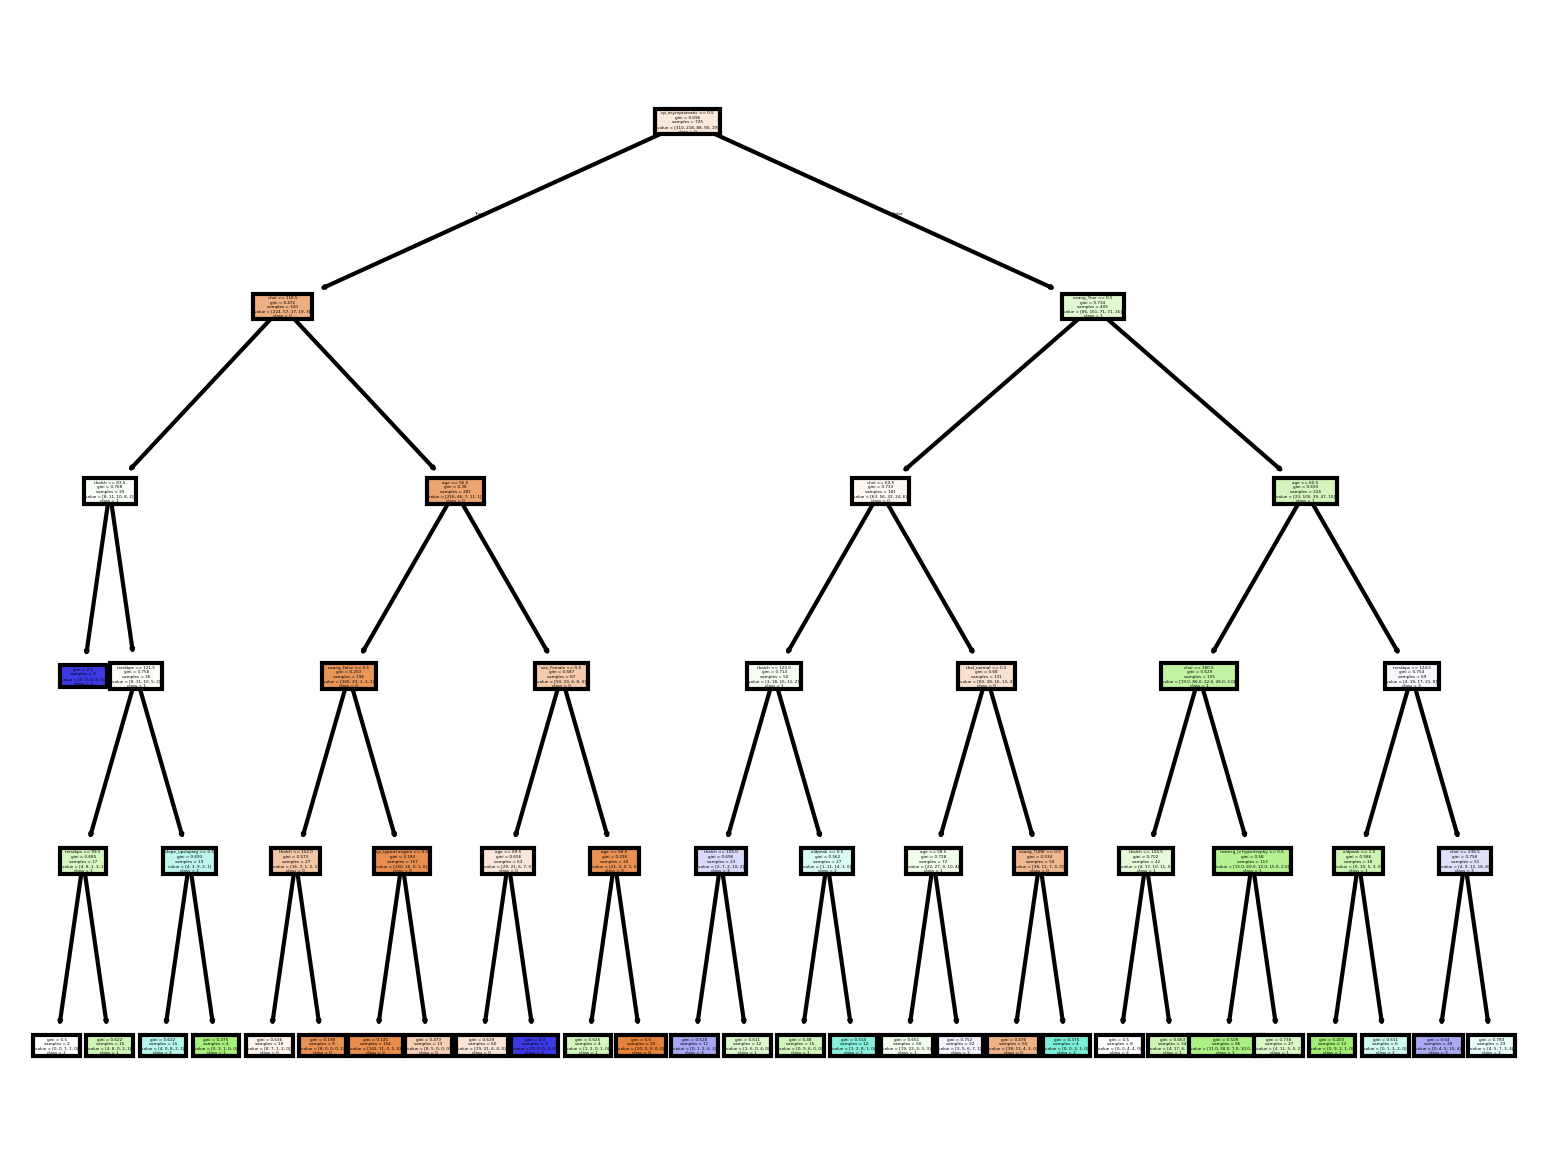

In [940]:
#PLot the decision tree
from sklearn import tree
plt.figure(figsize=(12,8))
fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=300)
tree.plot_tree(model,
               feature_names = fn,
                class_names=[str(x) for x in cn], # Convert integers in cn to strings
               filled = True);




### Before Hyperparameter Tuning:
- **Accuracy**: 56.04%
- **Precision**: 54.61%
- **Recall**: 56.04%
- **F1 Score**: 55.27%
- **ROC AUC Score**: 62.68%

### After Hyperparameter Tuning:
- **Best Parameters**: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
- **Accuracy on Testing Set**: 57.69%

### Key Differences:
- **Accuracy Improvement**: The accuracy improved slightly from 56.04% to 57.69% after tuning.
- **Hyperparameter Selection**: The best parameters were found to be 'gini' for the criterion, a max depth of 5, and a minimum of 2 samples to split a node.
- **Consistency in Metrics**: Precision, recall, and F1 score remained relatively consistent, indicating that the accuracy improvement did not compromise these metrics.

In summary, hyperparameter tuning led to a modest improvement in accuracy, suggesting that the selected hyperparameters were effective. However, there is still room for further optimization.

# **Interview Questions:**
**1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

1. **Max Depth**: Limits how deep the tree can go. A deeper tree can capture more details but might overfit the data.
2. **Min Samples Split**: The minimum number of samples needed to split a node. Higher values prevent the tree from splitting too soon, reducing overfitting.
3. **Criterion**: The method to measure the quality of a split (e.g., Gini impurity or entropy). The choice depends on the data and problem.
4. **Min Samples Leaf**: The minimum number of samples required at a leaf node. Higher values can prevent overfitting by ensuring leaves aren't too small.
5. **Max Features**: The number of features to consider when looking for the best split. Limiting this can reduce complexity and improve generalization.

**2. What is the difference between the Label encoding and One-hot encoding?**

- **Label Encoding**: Converts categories to numbers (e.g., "Male" = 0, "Female" = 1). It's simple but can imply an order that doesn't exist . It is used only on target variables for convertion to numbers.
- **One-Hot Encoding**: Converts categories to binary vectors (e.g., "Male" = [1, 0], "Female" = [0, 1]). It avoids implying any order but can create many columns if there are many categories.We can use it in both Feature and target variable as well for convertion